In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Spotify Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [3]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [4]:
#Convert 'WeekID' to DateTime Object & Check First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [5]:

keep = ['SongID', 'WeekID']
bb100a = bb100[keep]
    
features_keep = ['SongID', 'instrumentalness', 'speechiness']
features_a = features[features_keep]
    
bb100_features = pd.merge(bb100a, features_a, on='SongID', how='left')

In [6]:
bb100_features

,SongID,WeekID,instrumentalness,speechiness
0,Don't Just Stand TherePatty Duke,1965-07-17,0.000077,0.0298
1,Don't Just Stand TherePatty Duke,1965-07-24,0.000077,0.0298
2,Don't Just Stand TherePatty Duke,1965-07-31,0.000077,0.0298
3,Don't Just Stand TherePatty Duke,1965-08-07,0.000077,0.0298
4,Don't Just Stand TherePatty Duke,1965-08-14,0.000077,0.0298
...,...,...,...,...
330456,God Is A WomanAriana Grande,2018-10-20,0.000060,0.0558
330457,I Wanna Get Next To YouRose Royce,1977-05-21,0.030000,0.0314
330458,I Can't Stand ItEric Clapton And His Band,1981-05-23,NaN,NaN
330459,Here I Am Come & Take MeAl Green,1973-09-29,0.000084,0.0364


In [7]:
a = bb100_features.groupby(pd.Grouper(key='WeekID', axis=0, freq='1Y')).mean()


In [8]:
a.reset_index(inplace=True)

In [9]:
a

,WeekID,instrumentalness,speechiness
0,1958-12-31,0.062691,0.051397
1,1959-12-31,0.070608,0.057691
2,1960-12-31,0.070480,0.045528
3,1961-12-31,0.087808,0.052219
4,1962-12-31,0.071893,0.057662
...,...,...,...
59,2017-12-31,0.004120,0.116469
60,2018-12-31,0.003884,0.125148
61,2019-12-31,0.007480,0.125736
62,2020-12-31,0.004318,0.107855


In [10]:
a['Year']=a.WeekID.dt.year

In [11]:
a

,WeekID,instrumentalness,speechiness,Year
0,1958-12-31,0.062691,0.051397,1958
1,1959-12-31,0.070608,0.057691,1959
2,1960-12-31,0.070480,0.045528,1960
3,1961-12-31,0.087808,0.052219,1961
4,1962-12-31,0.071893,0.057662,1962
...,...,...,...,...
59,2017-12-31,0.004120,0.116469,2017
60,2018-12-31,0.003884,0.125148,2018
61,2019-12-31,0.007480,0.125736,2019
62,2020-12-31,0.004318,0.107855,2020


In [20]:
def get_era(x):
    era = '2000s~2020s'
    if (x < 1980):
        era = '1960s~1980s'
    elif (x < 2000):
        era = '1980s~2000s'

    return era

In [21]:
a['Era'] = a.Year.apply(get_era)

In [22]:
a

,WeekID,instrumentalness,speechiness,Year,Era
0,1958-12-31,0.062691,0.051397,1958,1960s~1980s
1,1959-12-31,0.070608,0.057691,1959,1960s~1980s
2,1960-12-31,0.070480,0.045528,1960,1960s~1980s
3,1961-12-31,0.087808,0.052219,1961,1960s~1980s
4,1962-12-31,0.071893,0.057662,1962,1960s~1980s
...,...,...,...,...,...
59,2017-12-31,0.004120,0.116469,2017,2000s~2020s
60,2018-12-31,0.003884,0.125148,2018,2000s~2020s
61,2019-12-31,0.007480,0.125736,2019,2000s~2020s
62,2020-12-31,0.004318,0.107855,2020,2000s~2020s


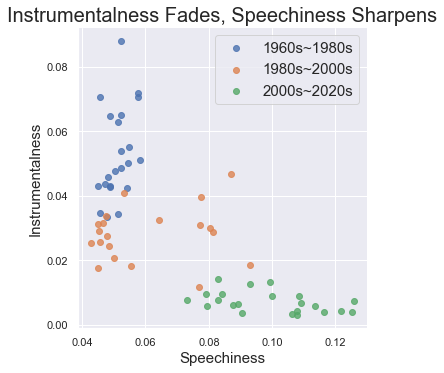

In [23]:
sns.lmplot(x='speechiness', y='instrumentalness', data=a, fit_reg=False, hue='Era', legend=False)

plt.title("Instrumentalness Fades, Speechiness Sharpens", fontsize=20)
plt.xlabel("Speechiness", fontsize=15)
plt.ylabel("Instrumentalness", fontsize=15)
plt.legend(fontsize=15)
plt.savefig('Era_Scatter', pad_inches=2)
plt.show();

In [25]:
a[a.Era == '1980s~2000s']

,WeekID,instrumentalness,speechiness,Year,Era
22,1980-12-31,0.033737,0.047485,1980,1980s~2000s
23,1981-12-31,0.017761,0.044961,1981,1980s~2000s
24,1982-12-31,0.027379,0.047954,1982,1980s~2000s
25,1983-12-31,0.024380,0.048512,1983,1980s~2000s
26,1984-12-31,0.025604,0.045557,1984,1980s~2000s
27,1985-12-31,0.031228,0.044988,1985,1980s~2000s
28,1986-12-31,0.025477,0.042746,1986,1980s~2000s
29,1987-12-31,0.029165,0.045196,1987,1980s~2000s
30,1988-12-31,0.031579,0.046444,1988,1980s~2000s
31,1989-12-31,0.020639,0.049929,1989,1980s~2000s


In [40]:
value = (a.Year < 1980)
value

0      True
1      True
2      True
3      True
4      True
      ...  
59    False
60    False
61    False
62    False
63    False
Name: Year, Length: 64, dtype: bool

In [45]:
value2 = (a.Year > 1980) & (a.Year < 2000)
value2

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Name: Year, Length: 64, dtype: bool

In [52]:
a['color']=np.where(value==True, 'red', 'green')
a['color']=np.where(value2==True, 'blue', 'red')

In [53]:
a

,WeekID,instrumentalness,speechiness,Year,color
0,1958-12-31,0.062691,0.051397,1958,red
1,1959-12-31,0.070608,0.057691,1959,red
2,1960-12-31,0.070480,0.045528,1960,red
3,1961-12-31,0.087808,0.052219,1961,red
4,1962-12-31,0.071893,0.057662,1962,red
...,...,...,...,...,...
59,2017-12-31,0.004120,0.116469,2017,red
60,2018-12-31,0.003884,0.125148,2018,red
61,2019-12-31,0.007480,0.125736,2019,red
62,2020-12-31,0.004318,0.107855,2020,red


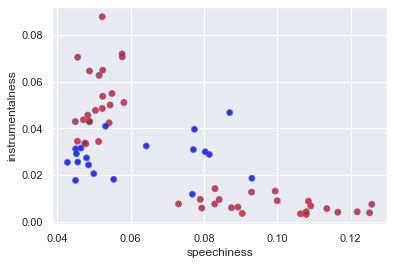

In [54]:
sns.regplot(data=a, x=a.speechiness, y=a.instrumentalness, 
            fit_reg=False, scatter_kws={'facecolor':a['color']});